In [210]:
from gda import gd_random  # descenso gradiente naıve con direccion de descenso aleatoria
from gdstep import gd_steepest  # descenso maximo naıve
from newton import newton_method  # descenso grediente de Newton, con Hessiano exacto
from nlcg import nonlinear_cg  # un metodo de gradiente conjugado (Fletcher-Reeves, Hestenes-Stiefel, Polak-Ribiere)
from bfgs import bfgs #  el método BFGS
import numpy as np

# a)

In [211]:
def f_xy(x):
    x1, y1 = x
    return x1**4 + y1**4 - 4*x1*y1 + 0.5*y1 + 1.0

def df_xy(x):
    x1, y1 = x
    dfx = 4*x1**3 - 4*y1
    dfy = 4*y1**3 - 4*x1 + 0.5
    return np.array([dfx, dfy], float)

def ddf_xy(x):
    x1, y1 = x
    return np.array([[12*x1**2, -4.0],
                     [-4.0,      12*y1**2]], float)

In [212]:
starts = [np.array([-3.0, 1.0])]

tol = 1e-6
maxIter = 20000
stop = "grad_norm"   # 'grad_norm' | 'step_norm' | 'f_change'
prt = 1
x0 = starts[0]

In [213]:
from utils import norm

results = {}
results["GD random"] = gd_random(f_xy, df_xy, x0, 1e-3, tol=tol, maxIter=maxIter, stop=stop, seed=0)
results["Steepest"]  = gd_steepest(f_xy, df_xy, x0, 1e-3, tol=tol, maxIter=maxIter, stop=stop)
results["Newton"]    = newton_method(f_xy, df_xy, ddf_xy, x0, 0.1, tol=tol, maxIter=500, stop=stop)
results["CG (PR+)"]  = nonlinear_cg(f_xy, df_xy, x0, 1e-3, tol=tol, maxIter=maxIter, stop=stop, formula="PR")
results["BFGS"]      = bfgs(f_xy, df_xy, x0, 1e-2, tol=tol, maxIter=maxIter, stop=stop)

print("Resumen (x*, f(x), ||g||, iters, conv):")
for name, (xbest, xs, fxs, errs, it, cv) in results.items():
    gnorm = norm(df_xy(xbest))
    print(f"{name:10s}  x={xbest}  f={f_xy(xbest): .6f}  ||g||={gnorm:.2e}  iters={it}  conv={cv}")

Resumen (x*, f(x), ||g||, iters, conv):
GD random   x=[-1.01474337 -1.04392265]  f=-1.511317  ||g||=9.25e-03  iters=20000  conv=0
Steepest    x=[-1.01462835 -1.04453034]  f=-1.511319  ||g||=9.94e-07  iters=2187  conv=1
Newton      x=[-1.01462847 -1.0445305 ]  f=-1.511319  ||g||=9.89e-07  iters=306  conv=1
CG (PR+)    x=[-1.01462835 -1.04453034]  f=-1.511319  ||g||=9.94e-07  iters=2187  conv=1
BFGS        x=[-1.01462836 -1.04453042]  f=-1.511319  ||g||=1.00e-06  iters=15948  conv=1


| Método     | x*                               | f(x)        | ‖g‖       | Iteraciones | Convergencia | Tolerancia | Step |
| :--------- | :------------------------------- | :---------- | :-------- | :---------- | :----------- | :---------: | :---: |
| GD random  | [-1.01474337, -1.04392265]       | -1.511317   | 9.25e-03  | 20000       | No           |       1e-6      |    1e-3   |
| Steepest   | [-1.01462835, -1.04453034]       | -1.511319   | 9.94e-07  | 2187        | Si          |       1e-6      |   1e-3    |
| Newton     | [-1.01462847, -1.0445305]        | -1.511319   | 9.89e-07  | 306         | Si           |      1e-6       |   0.1    |
| CG (PR+)   | [-1.01462835, -1.04453034]       | -1.511319   | 9.94e-07  | 2187        | Si           |       1e-6      |    1e-3   |
| BFGS       | [-1.01462836, -1.04453042]       | -1.511319   | 1.00e-06  | 15948       | Si           |       1e-6      |   1e-2    |


In [214]:
xx = np.linspace(-2.2, 1.6, 300)
yy = np.linspace(-2.0, 1.4, 300)
X, Y = np.meshgrid(xx, yy)
Z = X**4 + Y**4 - 4*X*Y + 0.5*Y + 1.0

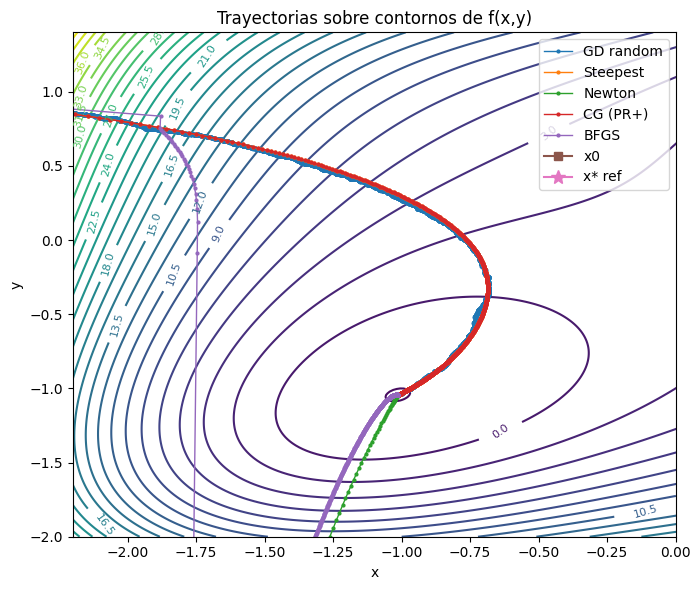

In [215]:
import matplotlib.pyplot as plt

x_star_ref = starts[0]

xx = np.linspace(-2.2, 1.6, 300)
yy = np.linspace(-2.0, 1.4, 300)
X, Y = np.meshgrid(xx, yy)
Z = X**4 + Y**4 - 4*X*Y + 0.5*Y + 1.0

plt.figure(figsize=(7,6))
CS = plt.contour(X, Y, Z, levels=30)
plt.clabel(CS, inline=1, fontsize=8)
for name, (_, xs, _, _, _, _) in results.items():
    arr = np.vstack(xs)
    plt.plot(arr[:,0], arr[:,1], marker='o', linewidth=1, markersize=2, label=name)
plt.plot([x0[0]],[x0[1]], marker='s', markersize=6, label="x0")
plt.plot([x_star_ref[0]],[x_star_ref[1]], marker='*', markersize=10, label="x* ref")
plt.title("Trayectorias sobre contornos de f(x,y)")
plt.xlabel("x"); plt.ylabel("y"); plt.legend(loc="best"); plt.tight_layout()
plt.xlim(-2.2, 0)
plt.ylim(-2.0, 1.4)
plt.show()

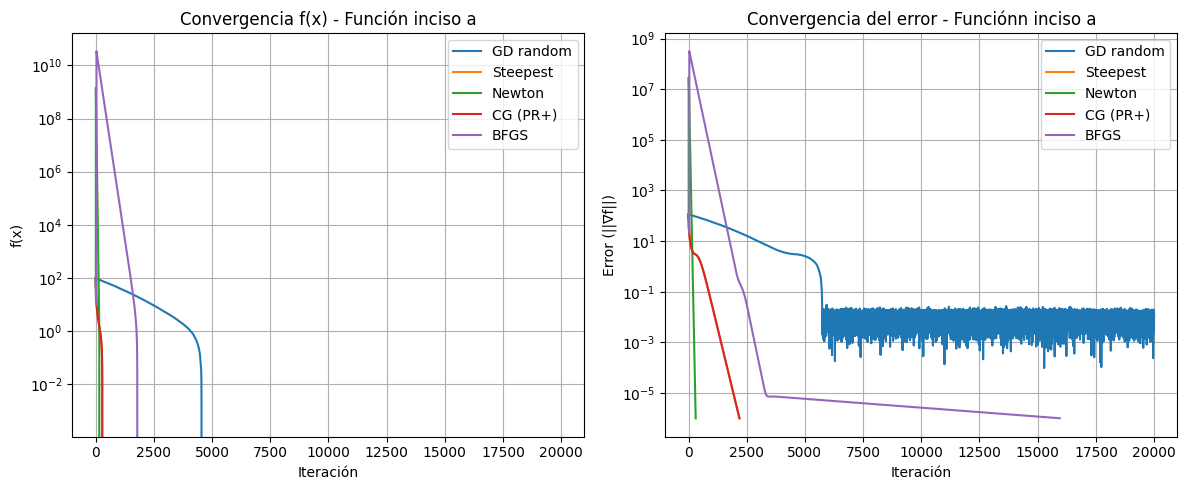

In [216]:
# Gráficas de convergencia para el inciso a
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for name, (_, _, fxs, _, _, _) in results.items():
    plt.semilogy(fxs, label=name)
plt.title("Convergencia f(x) - Función inciso a")
plt.xlabel("Iteración")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for name, (_, _, _, errs, _, _) in results.items():
    plt.semilogy(errs, label=name)
plt.title("Convergencia del error - Funciónn inciso a")
plt.xlabel("Iteración")
plt.ylabel("Error (||∇f||)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# b)

In [217]:
def rosenbrock_2d(x):
    x1, x2 = x
    return 100 * (x2 - x1**2)**2 + (1 - x1)**2

def df_rosenbrock_2d(x):
    x1, x2 = x
    dfx1 = -400 * x1 * (x2 - x1**2) - 2 * (1 - x1)
    dfx2 = 200 * (x2 - x1**2)
    return np.array([dfx1, dfx2], float)

def ddf_rosenbrock_2d(x):
    x1, x2 = x
    h11 = 1200 * x1**2 - 400 * x2 + 2
    h12 = -400 * x1
    h22 = 200
    return np.array([[h11, h12],
                     [h12, h22]], float)

In [218]:
x0_rosen_2d = np.array([-1.2, 1.0])
tol = 1e-6
maxIter = 20000
stop = "grad_norm"

In [219]:
results_rosen_2d = {}
results_rosen_2d["GD random"] = gd_random(rosenbrock_2d, df_rosenbrock_2d, x0_rosen_2d, 1e-4, tol=tol, maxIter=maxIter, stop=stop, seed=0)
results_rosen_2d["Steepest"]  = gd_steepest(rosenbrock_2d, df_rosenbrock_2d, x0_rosen_2d, 1e-4, tol=tol, maxIter=maxIter, stop=stop)
results_rosen_2d["Newton"]    = newton_method(rosenbrock_2d, df_rosenbrock_2d, ddf_rosenbrock_2d, x0_rosen_2d, 1.0, tol=tol, maxIter=500, stop=stop)
results_rosen_2d["CG (PR+)"]  = nonlinear_cg(rosenbrock_2d, df_rosenbrock_2d, x0_rosen_2d, 1e-4, tol=tol, maxIter=maxIter, stop=stop, formula="PR")
results_rosen_2d["BFGS"]      = bfgs(rosenbrock_2d, df_rosenbrock_2d, x0_rosen_2d, 1e-2, tol=tol, maxIter=maxIter, stop=stop)


In [220]:
print("=== ROSENBROCK 2D ===")
print("Resumen (x*, f(x), ||g||, iters, conv):")
for name, (xbest, xs, fxs, errs, it, cv) in results_rosen_2d.items():
    gnorm = norm(df_rosenbrock_2d(xbest))
    print(f"{name:10s}  x={xbest}  f={rosenbrock_2d(xbest): .6e}  ||g||={gnorm:.2e}  iters={it}  conv={cv}")

=== ROSENBROCK 2D ===
Resumen (x*, f(x), ||g||, iters, conv):
GD random   x=[-0.41182563  0.17588129]  f= 1.997197e+00  ||g||=2.19e+00  iters=20000  conv=0
Steepest    x=[0.71965356 0.516586  ]  f= 7.876711e-02  ||g||=3.20e-01  iters=20000  conv=0
Newton      x=[1. 1.]  f= 3.432646e-20  ||g||=8.29e-09  iters=6  conv=1
CG (PR+)    x=[0.71965777 0.51659208]  f= 7.876475e-02  ||g||=3.20e-01  iters=20000  conv=0
BFGS        x=[1.00000022 1.00000043]  f= 4.749435e-14  ||g||=9.94e-07  iters=2917  conv=1


| Método     | x*                          | f(x)          | ‖g‖       | Iteraciones | Convergencia | Tolerancia | Step  |
| :--------- | :-------------------------- | :------------ | :-------- | :---------- | :----------- | :--------- | :---- |
| GD random  | [-0.41182563, 0.17588129]   | 1.997197e+00  | 2.19e+00  | 20000       | No            |      1e-6      | 1e-4  |
| Steepest   | [0.71965356, 0.516586]      | 7.876711e-02  | 3.20e-01  | 20000       | No            |      1e-6      | 1e-4  |
| Newton     | [1.0, 1.0]                  | 3.432646e-20  | 8.29e-09  | 6           | Si            |      1e-6      | 1.0   |
| CG (PR+)   | [0.71965777, 0.51659208]    | 7.876475e-02  | 3.20e-01  | 20000       | No            |     1e-6       | 1e-4  |
| BFGS       | [1.00000022, 1.00000043]    | 4.749435e-14  | 9.94e-07  | 2917        | Si            |      1e-6      | 1e-2  |


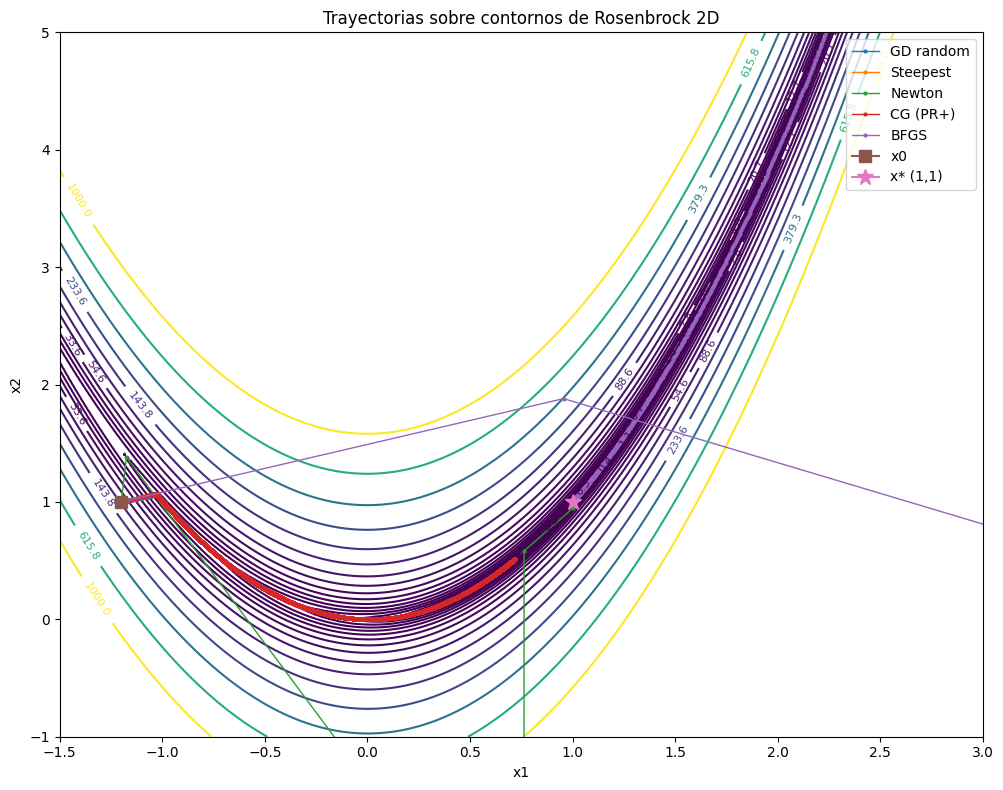

In [221]:
xx = np.linspace(-1.5, 3.0, 300)
yy = np.linspace(-1.0, 5.0, 300)
X, Y = np.meshgrid(xx, yy)
Z = 400 * (Y - X**2)**2 + (1 - X)**2

plt.figure(figsize=(10, 8))
CS = plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 20))
plt.clabel(CS, inline=1, fontsize=8)

for name, (_, xs, _, _, _, _) in results_rosen_2d.items():
    arr = np.vstack(xs)
    plt.plot(arr[:,0], arr[:,1], marker='o', linewidth=1, markersize=2, label=name)

plt.plot([x0_rosen_2d[0]], [x0_rosen_2d[1]], marker='s', markersize=8, label="x0")
plt.plot([1.0], [1.0], marker='*', markersize=12, label="x* (1,1)")
plt.title("Trayectorias sobre contornos de Rosenbrock 2D")
plt.xlabel("x1"); plt.ylabel("x2"); plt.legend(); plt.tight_layout()
plt.xlim(-1.5, 3.0)
plt.ylim(-1.0, 5.0)
plt.show()

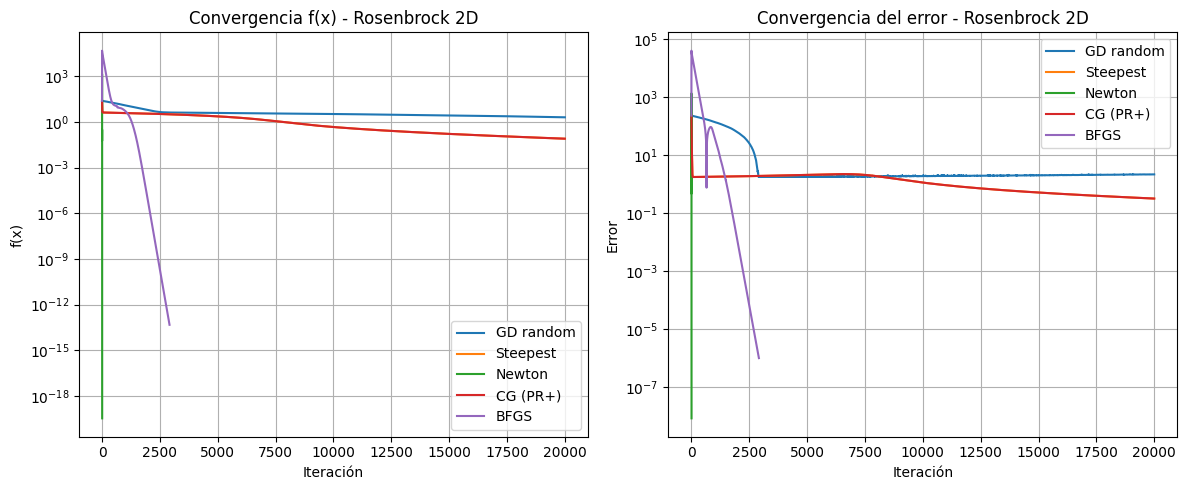

In [222]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for name, (_, _, fxs, errs, _, _) in results_rosen_2d.items():
    plt.semilogy(fxs, label=name)
plt.title("Convergencia f(x) - Rosenbrock 2D")
plt.xlabel("Iteración")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for name, (_, _, _, errs, _, _) in results_rosen_2d.items():
    plt.semilogy(errs, label=name)
plt.title("Convergencia del error - Rosenbrock 2D")
plt.xlabel("Iteración")
plt.ylabel("Error")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# c)

In [223]:
def rosenbrock_nd(x):
    n = len(x)
    f = 0.0
    for i in range(n-1):
        f += 100 * (x[i+1] - x[i]**2)**2 + (1 - x[i])**2
    return f

def df_rosenbrock_nd(x):
    n = len(x)
    grad = np.zeros(n)
    for i in range(n):
        if i == 0:
            grad[i] = -400 * x[i] * (x[i+1] - x[i]**2) - 2 * (1 - x[i])
        elif i == n-1:
            grad[i] = 200 * (x[i] - x[i-1]**2)
        else:
            grad[i] = 200 * (x[i] - x[i-1]**2) - 400 * x[i] * (x[i+1] - x[i]**2) - 2 * (1 - x[i])
    return grad

def ddf_rosenbrock_nd(x):
    n = len(x)
    H = np.zeros((n, n))
    for i in range(n):
        if i == 0:
            H[i,i] = 1200 * x[i]**2 - 400 * x[i+1] + 2
            H[i,i+1] = -400 * x[i]
        elif i == n-1:
            H[i,i] = 200
            H[i,i-1] = -400 * x[i-1]
        else:
            H[i,i] = 1200 * x[i]**2 - 400 * x[i+1] + 202
            H[i,i+1] = -400 * x[i]
            H[i,i-1] = -400 * x[i-1]
    return H

In [224]:
x0_rosen_7d = np.array([-1.2, 1.0, 1.0, 1.0, 1.0, -1.2, 1.0])
tol = 1e-6
maxIter = 20000
stop = "grad_norm"

In [ ]:
results_rosen_7d = {}
results_rosen_7d["GD random"] = gd_random(rosenbrock_nd, df_rosenbrock_nd, x0_rosen_7d, 1e-6, tol=tol, maxIter=maxIter, stop=stop, seed=0)
results_rosen_7d["Steepest"]  = gd_steepest(rosenbrock_nd, df_rosenbrock_nd, x0_rosen_7d, 1e-7, tol=tol, maxIter=maxIter, stop=stop)
results_rosen_7d["CG (FR)"]  = nonlinear_cg(rosenbrock_nd, df_rosenbrock_nd, x0_rosen_7d, 1e-6, tol=tol, maxIter=maxIter, stop=stop, formula="FR")
results_rosen_7d["BFGS"]      = bfgs(rosenbrock_nd, df_rosenbrock_nd, x0_rosen_7d, 1e-3, tol=tol, maxIter=maxIter, stop=stop)

maxIter_newton = 1000  # Muchas menos iteraciones es computaiconalmente mas complejo
tol_newton = 1e-4      # tolerancia mas permisiva

try:
    results_rosen_7d["Newton"] = newton_method(
        rosenbrock_nd, 
        df_rosenbrock_nd, 
        ddf_rosenbrock_nd, 
        x0_rosen_7d, 
        1.0,           
        tol=tol_newton, 
        maxIter=maxIter_newton, 
        stop=stop
    )
    print("Newton completado")
except Exception as e:
    print(f"Newton falló: {e}")

Newton completado exitosamente!


In [ ]:
print("\nROSENBROCK 7D")
print("Resumen (f(x), ||g||, iters, conv, xbest):")
for name, (xbest, xs, fxs, errs, it, cv) in results_rosen_7d.items():
    gnorm = norm(df_rosenbrock_nd(xbest))
    print(f"{name:10s}  f={rosenbrock_nd(xbest): .6e}  ||g||={gnorm:.2e}  iters={it}  conv={cv}")
    print(f"           x_final = {xbest}")


ROSENBROCK 7D
Resumen (f(x), ||g||, iters, conv):
GD random   f= 5.254036e+02  ||g||=1.11e+03  iters=20000  conv=0
           x_final = [-1.19881077  1.00051697  1.00002049  0.99999085  0.99511913 -1.19634705
  1.00052807]
Steepest    f= 1.192254e+02  ||g||=1.72e+02  iters=20000  conv=0
           x_final = [-1.03873419  1.02111796  0.97474704  0.84214601  0.42321511 -0.76297284
  0.9386166 ]
CG (FR)     f= 3.983601e+00  ||g||=9.97e-07  iters=19586  conv=1
           x_final = [-0.99172255  0.99355534  0.99217322  0.98689856  0.97516436  0.95143121
  0.90522134]
BFGS        f= 3.983601e+00  ||g||=3.42e-04  iters=20000  conv=0
           x_final = [-0.99172433  0.99355895  0.99218048  0.9869126   0.97519144  0.95148368
  0.90532077]
Newton      f= 3.983601e+00  ||g||=9.50e-07  iters=12  conv=1
           x_final = [-0.99172255  0.99355535  0.99217324  0.98689861  0.97516445  0.95143138
  0.90522168]


| Método     | x_final                                                                 | f(x)          | ‖g‖       | Iteraciones | Convergencia | Tolerancia | Step |
| :--------- | :---------------------------------------------------------------------- | :------------ | :-------- | :---------- | :----------- | :---------: | :---: |
| GD random  | [-1.19881077, 1.00051697, 1.00002049, 0.99999085, 0.99511913, -1.19634705, 1.00052807] | 5.254036e+02  | 1.11e+03  | 20000       | No            |    1e-6      | 1e-6  |
| Steepest   | [-1.03873419, 1.02111796, 0.97474704, 0.84214601, 0.42321511, -0.76297284, 0.9386166]  | 1.192254e+02  | 1.72e+02  | 20000       | No            |    1e-6      | 1e-7  |
| CG (FR)    | [-0.99172255, 0.99355534, 0.99217322, 0.98689856, 0.97516436, 0.95143121, 0.90522134] | 3.983601e+00  | 9.97e-07  | 19586       | Si            |    1e-6      | 1e-6  |
| BFGS       | [-0.99172433, 0.99355895, 0.99218048, 0.9869126, 0.97519144, 0.95148368, 0.90532077]  | 3.983601e+00  | 3.42e-04  | 20000       | No            |    1e-6      | 1e-3  |
| Newton     | [-0.99172255, 0.99355535, 0.99217324, 0.98689861, 0.97516445, 0.95143138, 0.90522168] | 3.983601e+00  | 9.50e-07  | 12          | Si            |    1e-6      | 1     |


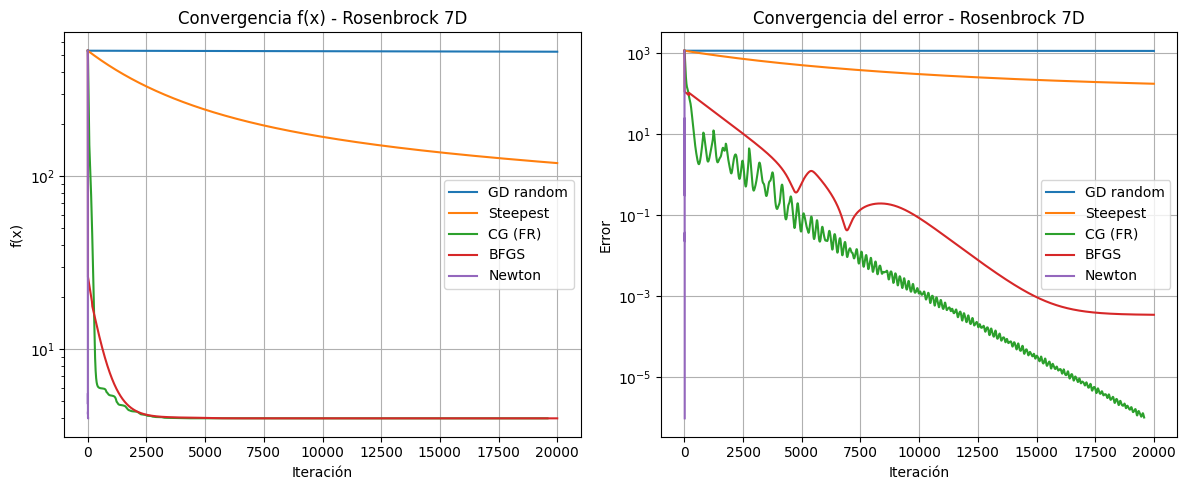

In [230]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for name, (_, _, fxs, errs, _, _) in results_rosen_7d.items():
    plt.semilogy(fxs, label=name)
plt.title("Convergencia f(x) - Rosenbrock 7D")
plt.xlabel("Iteración")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for name, (_, _, _, errs, _, _) in results_rosen_7d.items():
    plt.semilogy(errs, label=name)
plt.title("Convergencia del error - Rosenbrock 7D")
plt.xlabel("Iteración")
plt.ylabel("Error")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()